# Libs

In [1]:
import warnings
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')
sns.set_style("darkgrid")

# Data

In [2]:
df = pd.read_csv('../data/dataset.csv')
df

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [3]:
df.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

In [4]:
df.drop_duplicates(subset=['track_name', 'artists'], inplace=True)
df.drop('Unnamed: 0', axis=1, inplace=True)
df.reset_index(inplace=True, drop=True)
df

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81339,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
81340,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
81341,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
81342,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


# EDA

### Popularity

In [5]:
df.sort_values(by='popularity', ascending=False).head(15)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
17152,3nqQXoyQOWXiESFLlDF1hG,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,156943,False,0.714,0.472,2,-7.375,1,0.0864,0.01300,0.000005,0.2660,0.238,131.121,4,dance
41581,2tTmW7RDtMQtBk7m2rYeSw,Bizarrap;Quevedo,"Quevedo: Bzrp Music Sessions, Vol. 52","Quevedo: Bzrp Music Sessions, Vol. 52",99,198937,False,0.621,0.782,2,-5.548,1,0.0440,0.01250,0.033000,0.2300,0.550,128.033,4,hip-hop
51530,5ww2BF9slyYgNOk37BlC4u,Manuel Turizo,La Bachata,La Bachata,98,162637,False,0.835,0.679,7,-5.329,0,0.0364,0.58300,0.000002,0.2180,0.850,124.980,4,latin
17159,4uUG5RXrOk84mYEfFvj3cK,David Guetta;Bebe Rexha,I'm Good (Blue),I'm Good (Blue),98,175238,True,0.561,0.965,7,-3.673,0,0.0343,0.00383,0.000007,0.3710,0.304,128.040,4,dance
51532,1IHWl5LamUGEuP4ozKQSXZ,Bad Bunny,Un Verano Sin Ti,Tití Me Preguntó,97,243716,False,0.650,0.715,5,-5.198,0,0.2530,0.09930,0.000291,0.1260,0.187,106.672,4,latin
51531,6Sq7ltF9Qa7SNFBsV5Cogx,Bad Bunny;Chencho Corleone,Un Verano Sin Ti,Me Porto Bonito,97,178567,True,0.911,0.712,1,-5.105,0,0.0817,0.09010,0.000027,0.0933,0.425,92.005,4,latin
51649,5Eax0qFko2dh7Rl2lYs3bx,Bad Bunny,Un Verano Sin Ti,Efecto,96,213061,False,0.801,0.475,7,-8.797,0,0.0516,0.14100,0.000017,0.0639,0.234,98.047,4,latin
17151,5IgjP7X4th6nMNDh4akUHb,Chris Brown,Indigo (Extended),Under The Influence,96,184613,True,0.733,0.690,9,-5.529,0,0.0427,0.06350,0.000001,0.1050,0.310,116.992,4,dance
59743,4h9wh7iOZ0GGn8QVp4RAOB,OneRepublic,I Ain’t Worried (Music From The Motion Picture...,I Ain't Worried,96,148485,False,0.704,0.797,0,-5.927,1,0.0475,0.08260,0.000745,0.0546,0.825,139.994,4,piano
61257,4LRPiXqCikLlN15c3yImP7,Harry Styles,As It Was,As It Was,95,167303,False,0.520,0.731,6,-5.338,0,0.0557,0.34200,0.001010,0.3110,0.662,173.930,4,pop


In [6]:
df['popularity'].value_counts().sort_index(ascending=False)

popularity
100       1
99        1
98        2
97        2
96        3
       ... 
4       176
3       220
2       297
1       687
0      5452
Name: count, Length: 101, dtype: int64

In [7]:
df.loc[df['popularity']==100]

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
17152,3nqQXoyQOWXiESFLlDF1hG,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,156943,False,0.714,0.472,2,-7.375,1,0.0864,0.013,0.000005,0.266,0.238,131.121,4,dance


### Artists

In [8]:
df['artists'].value_counts()

artists
George Jones                                             215
my little airport                                        163
The Beatles                                              149
Håkan Hellström                                          122
Scooter                                                  116
                                                        ... 
George Dalaras;Emma Shapplin                               1
Frankie Knuckles;Director's Cut;Eric Kupper;Inaya Day      1
Carlos Paredes                                             1
George Dalaras;Babis Stokas                                1
Jesus Culture                                              1
Name: count, Length: 31437, dtype: int64

Text(0.5, 1.0, 'Most Common Artists in DataBase')

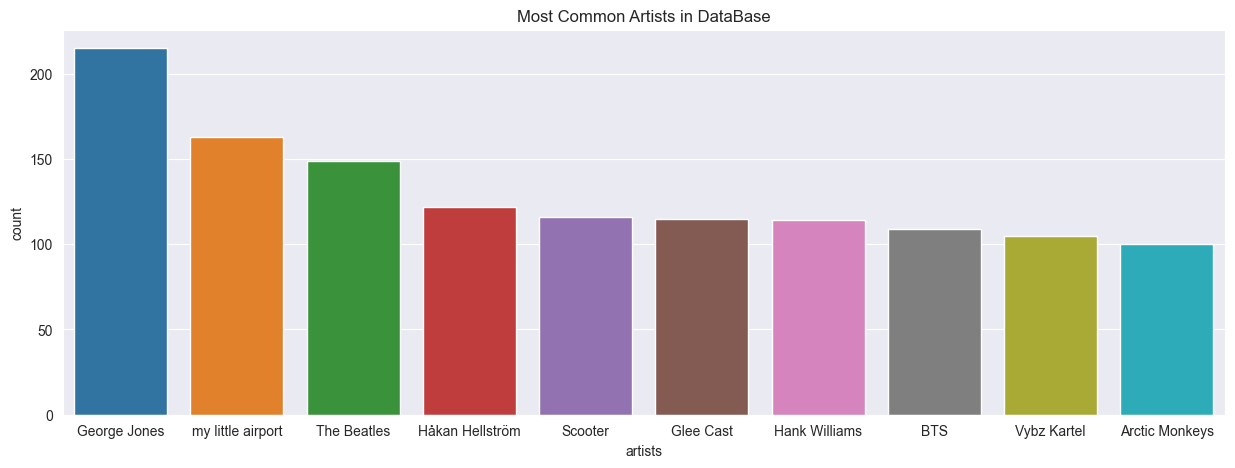

In [9]:
plt.figure(figsize=(15,5))
sns.barplot(data=pd.DataFrame(df['artists'].value_counts().iloc[:10]).reset_index(), x='artists', y='count')
plt.title('Most Common Artists in DataBase')

Text(0.5, 1.0, 'Most Popular Artists in DataBase')

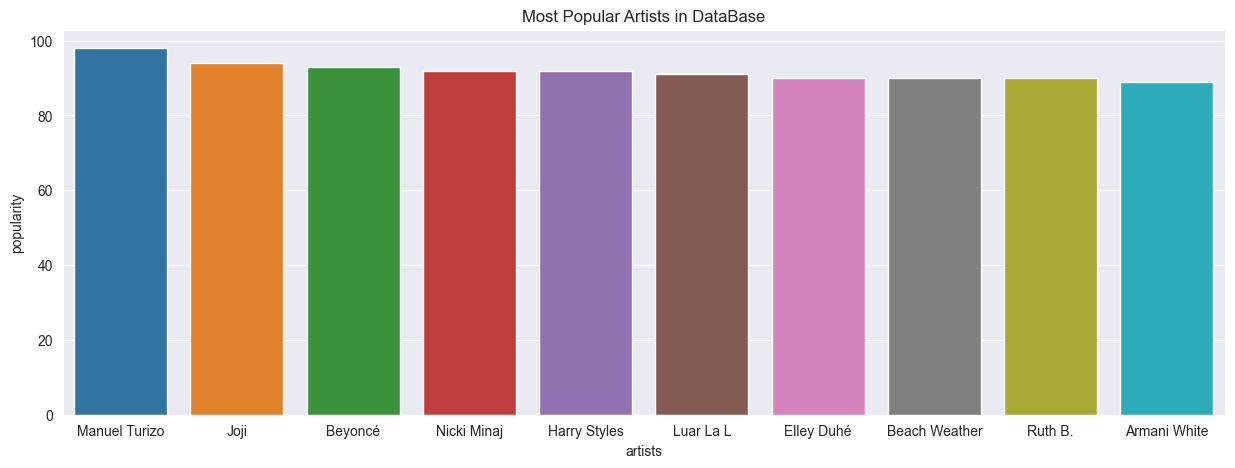

In [10]:
plt.figure(figsize=(15,5))
sns.barplot(data=pd.DataFrame(df.loc[df['artists'].str.contains(';').fillna(False)==False].groupby('artists')['popularity'].mean()).reset_index().sort_values(by='popularity', ascending=False).iloc[:10], x='artists', y='popularity')
plt.title('Most Popular Artists in DataBase')

### Featured Songs x Non Featured Songs Popualarity

In [11]:
# non-featured

nf = df.loc[(df['track_name'].str.contains('feat.', case=False).fillna(False)==False) & (df['track_name'].str.contains('featuring', case=False).fillna(False)==False) & (df['artists'].str.contains(';').fillna(False)==False)]

In [12]:
# featured

f = df.loc[(df['track_name'].str.contains('feat.', case=False).fillna(False)==True) | (df['track_name'].str.contains('featuring', case=False).fillna(False)==True) | (df['artists'].str.contains(';').fillna(False)==True)]

In [13]:
t_statistic, p_value = stats.ttest_ind(nf['popularity'], f['popularity'])

In [14]:
alpha = 0.05

In [15]:
if p_value < alpha:
    print("Reject H0: There is difference between the averages")
else:
    print("Accept H0: There is NO difference between the averages")

Reject H0: There is difference between the averages


In [16]:
nf['popularity'].mean()

34.169848455028536

In [17]:
f['popularity'].mean()

36.03102297270764

Featured songs are more popular.

### Explicit

<Axes: xlabel='explicit', ylabel='count'>

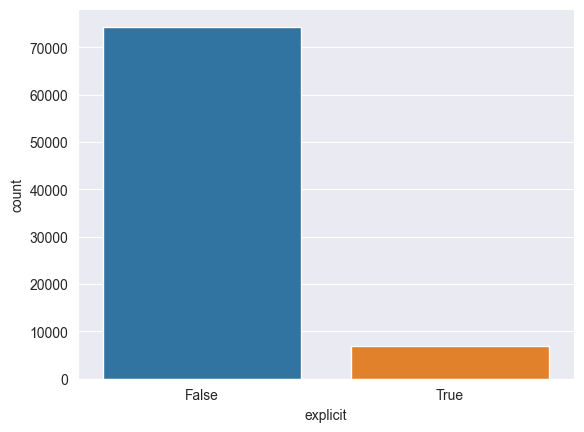

In [18]:
sns.countplot(data=df, x='explicit')

# Feature Engineering

In [19]:
f = df.loc[(df['track_name'].str.contains('feat.', case=False).fillna(False)==True) | (df['track_name'].str.contains('featuring', case=False).fillna(False)==True) | (df['artists'].str.contains(';').fillna(False)==True)]
f

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.359,0,-9.734,1,0.0557,0.21000,0.000000,0.1170,0.1200,76.332,4,acoustic
6,6Vc5wAMmXdKIAM7WUoEb7N,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,74,229400,False,0.407,0.147,2,-8.822,1,0.0355,0.85700,0.000003,0.0913,0.0765,141.284,3,acoustic
8,0IktbUcnAGrvD03AWnz3Q8,Jason Mraz;Colbie Caillat,We Sing. We Dance. We Steal Things.,Lucky,74,189613,False,0.625,0.414,0,-8.700,1,0.0369,0.29400,0.000000,0.1510,0.6690,130.088,4,acoustic
14,4LbWtBkN82ZRhz9jqzgrb3,Chord Overstreet;Deepend,Hold On (Remix),Hold On - Remix,56,188133,False,0.755,0.780,2,-6.084,1,0.0327,0.12400,0.000028,0.1210,0.3870,120.004,4,acoustic
16,6xKeQgzfjixSUld14qUezm,Andrew Foy;Renee Foy,ily (i love you baby),ily (i love you baby),56,129750,False,0.706,0.112,2,-18.098,1,0.0391,0.82700,0.000004,0.1250,0.4140,110.154,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81311,42bdU7oDyRvyRXaKbUrtfu,Bethel Music;Bethany Wohrle,Victory (Live),Victory Is Yours - Live,44,333080,False,0.418,0.786,9,-5.257,1,0.0471,0.01050,0.000000,0.3420,0.0656,139.920,4,world-music
81312,1eZYPovTvmxk3QlVD2VpCX,Bethel Music;Brian Johnson,We Will Not Be Shaken (Live),We Will Not Be Shaken - Live,46,332604,False,0.392,0.668,9,-7.342,1,0.0296,0.00356,0.000560,0.5880,0.1150,148.013,4,world-music
81314,7mD7yAQm4GcifSnWqJdZHi,Bethel Music;Molly Skaggs,Victory (Live),Ain’t No Grave - Live,47,493293,False,0.370,0.831,4,-4.484,1,0.0442,0.01290,0.000122,0.1090,0.1850,148.008,4,world-music
81320,2yAo8cJDVoMjBMS5MgrO8P,Hillsong Worship;Hillsong Young & Free,OPEN HEAVEN / River Wild,This Is Living,38,214647,False,0.611,0.857,0,-6.248,0,0.0384,0.00182,0.000000,0.3260,0.4640,128.001,4,world-music


In [20]:
df.drop(f.index.tolist(), axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

In [21]:
without_feat_in_name = f.loc[f['track_name'].str.contains('feat')==False]
without_feat_in_name

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.359,0,-9.734,1,0.0557,0.21000,0.000000,0.1170,0.1200,76.332,4,acoustic
6,6Vc5wAMmXdKIAM7WUoEb7N,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,74,229400,False,0.407,0.147,2,-8.822,1,0.0355,0.85700,0.000003,0.0913,0.0765,141.284,3,acoustic
8,0IktbUcnAGrvD03AWnz3Q8,Jason Mraz;Colbie Caillat,We Sing. We Dance. We Steal Things.,Lucky,74,189613,False,0.625,0.414,0,-8.700,1,0.0369,0.29400,0.000000,0.1510,0.6690,130.088,4,acoustic
14,4LbWtBkN82ZRhz9jqzgrb3,Chord Overstreet;Deepend,Hold On (Remix),Hold On - Remix,56,188133,False,0.755,0.780,2,-6.084,1,0.0327,0.12400,0.000028,0.1210,0.3870,120.004,4,acoustic
16,6xKeQgzfjixSUld14qUezm,Andrew Foy;Renee Foy,ily (i love you baby),ily (i love you baby),56,129750,False,0.706,0.112,2,-18.098,1,0.0391,0.82700,0.000004,0.1250,0.4140,110.154,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81311,42bdU7oDyRvyRXaKbUrtfu,Bethel Music;Bethany Wohrle,Victory (Live),Victory Is Yours - Live,44,333080,False,0.418,0.786,9,-5.257,1,0.0471,0.01050,0.000000,0.3420,0.0656,139.920,4,world-music
81312,1eZYPovTvmxk3QlVD2VpCX,Bethel Music;Brian Johnson,We Will Not Be Shaken (Live),We Will Not Be Shaken - Live,46,332604,False,0.392,0.668,9,-7.342,1,0.0296,0.00356,0.000560,0.5880,0.1150,148.013,4,world-music
81314,7mD7yAQm4GcifSnWqJdZHi,Bethel Music;Molly Skaggs,Victory (Live),Ain’t No Grave - Live,47,493293,False,0.370,0.831,4,-4.484,1,0.0442,0.01290,0.000122,0.1090,0.1850,148.008,4,world-music
81320,2yAo8cJDVoMjBMS5MgrO8P,Hillsong Worship;Hillsong Young & Free,OPEN HEAVEN / River Wild,This Is Living,38,214647,False,0.611,0.857,0,-6.248,0,0.0384,0.00182,0.000000,0.3260,0.4640,128.001,4,world-music


In [22]:
without_feat_in_name['artists'] = without_feat_in_name['artists'].str.split(';')
without_feat_in_name

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
2,1iJBSr7s7jYXzM8EGcbK5b,"[Ingrid Michaelson, ZAYN]",To Begin Again,To Begin Again,57,210826,False,0.438,0.359,0,-9.734,1,0.0557,0.21000,0.000000,0.1170,0.1200,76.332,4,acoustic
6,6Vc5wAMmXdKIAM7WUoEb7N,"[A Great Big World, Christina Aguilera]",Is There Anybody Out There?,Say Something,74,229400,False,0.407,0.147,2,-8.822,1,0.0355,0.85700,0.000003,0.0913,0.0765,141.284,3,acoustic
8,0IktbUcnAGrvD03AWnz3Q8,"[Jason Mraz, Colbie Caillat]",We Sing. We Dance. We Steal Things.,Lucky,74,189613,False,0.625,0.414,0,-8.700,1,0.0369,0.29400,0.000000,0.1510,0.6690,130.088,4,acoustic
14,4LbWtBkN82ZRhz9jqzgrb3,"[Chord Overstreet, Deepend]",Hold On (Remix),Hold On - Remix,56,188133,False,0.755,0.780,2,-6.084,1,0.0327,0.12400,0.000028,0.1210,0.3870,120.004,4,acoustic
16,6xKeQgzfjixSUld14qUezm,"[Andrew Foy, Renee Foy]",ily (i love you baby),ily (i love you baby),56,129750,False,0.706,0.112,2,-18.098,1,0.0391,0.82700,0.000004,0.1250,0.4140,110.154,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81311,42bdU7oDyRvyRXaKbUrtfu,"[Bethel Music, Bethany Wohrle]",Victory (Live),Victory Is Yours - Live,44,333080,False,0.418,0.786,9,-5.257,1,0.0471,0.01050,0.000000,0.3420,0.0656,139.920,4,world-music
81312,1eZYPovTvmxk3QlVD2VpCX,"[Bethel Music, Brian Johnson]",We Will Not Be Shaken (Live),We Will Not Be Shaken - Live,46,332604,False,0.392,0.668,9,-7.342,1,0.0296,0.00356,0.000560,0.5880,0.1150,148.013,4,world-music
81314,7mD7yAQm4GcifSnWqJdZHi,"[Bethel Music, Molly Skaggs]",Victory (Live),Ain’t No Grave - Live,47,493293,False,0.370,0.831,4,-4.484,1,0.0442,0.01290,0.000122,0.1090,0.1850,148.008,4,world-music
81320,2yAo8cJDVoMjBMS5MgrO8P,"[Hillsong Worship, Hillsong Young & Free]",OPEN HEAVEN / River Wild,This Is Living,38,214647,False,0.611,0.857,0,-6.248,0,0.0384,0.00182,0.000000,0.3260,0.4640,128.001,4,world-music


In [23]:
without_feat_in_name['track_name'] = without_feat_in_name['track_name'] + ' (feat. ' + without_feat_in_name['artists'].map(lambda x: ' / '.join(x[1:])) + ')'
without_feat_in_name['artists'] = without_feat_in_name['artists'].map(lambda x: x[0])
without_feat_in_name

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson,To Begin Again,To Begin Again (feat. ZAYN),57,210826,False,0.438,0.359,0,-9.734,1,0.0557,0.21000,0.000000,0.1170,0.1200,76.332,4,acoustic
6,6Vc5wAMmXdKIAM7WUoEb7N,A Great Big World,Is There Anybody Out There?,Say Something (feat. Christina Aguilera),74,229400,False,0.407,0.147,2,-8.822,1,0.0355,0.85700,0.000003,0.0913,0.0765,141.284,3,acoustic
8,0IktbUcnAGrvD03AWnz3Q8,Jason Mraz,We Sing. We Dance. We Steal Things.,Lucky (feat. Colbie Caillat),74,189613,False,0.625,0.414,0,-8.700,1,0.0369,0.29400,0.000000,0.1510,0.6690,130.088,4,acoustic
14,4LbWtBkN82ZRhz9jqzgrb3,Chord Overstreet,Hold On (Remix),Hold On - Remix (feat. Deepend),56,188133,False,0.755,0.780,2,-6.084,1,0.0327,0.12400,0.000028,0.1210,0.3870,120.004,4,acoustic
16,6xKeQgzfjixSUld14qUezm,Andrew Foy,ily (i love you baby),ily (i love you baby) (feat. Renee Foy),56,129750,False,0.706,0.112,2,-18.098,1,0.0391,0.82700,0.000004,0.1250,0.4140,110.154,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81311,42bdU7oDyRvyRXaKbUrtfu,Bethel Music,Victory (Live),Victory Is Yours - Live (feat. Bethany Wohrle),44,333080,False,0.418,0.786,9,-5.257,1,0.0471,0.01050,0.000000,0.3420,0.0656,139.920,4,world-music
81312,1eZYPovTvmxk3QlVD2VpCX,Bethel Music,We Will Not Be Shaken (Live),We Will Not Be Shaken - Live (feat. Brian John...,46,332604,False,0.392,0.668,9,-7.342,1,0.0296,0.00356,0.000560,0.5880,0.1150,148.013,4,world-music
81314,7mD7yAQm4GcifSnWqJdZHi,Bethel Music,Victory (Live),Ain’t No Grave - Live (feat. Molly Skaggs),47,493293,False,0.370,0.831,4,-4.484,1,0.0442,0.01290,0.000122,0.1090,0.1850,148.008,4,world-music
81320,2yAo8cJDVoMjBMS5MgrO8P,Hillsong Worship,OPEN HEAVEN / River Wild,This Is Living (feat. Hillsong Young & Free),38,214647,False,0.611,0.857,0,-6.248,0,0.0384,0.00182,0.000000,0.3260,0.4640,128.001,4,world-music


In [24]:
with_feat_in_name = f.loc[f['track_name'].str.contains('feat')==True]
with_feat_in_name

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
208,03VNgdCL9t8aPyvwZecglI,Jason Mraz;Meghan Trainor,Know.,More Than Friends (feat. Meghan Trainor),54,181360,False,0.451,0.528,2,-6.984,1,0.0364,0.3660,0.000000,0.0811,0.527,139.280,5,acoustic
281,2Sg5gtKvSiRf7TBjI0ObF2,Jonah Baker;Sara Phillips,Covers,We Don't Talk Anymore / Cold (feat. Sara Phill...,26,222911,False,0.524,0.328,11,-10.001,1,0.0403,0.8170,0.000000,0.1180,0.599,99.941,4,acoustic
286,6j9kSGlYLZdZ9sZkY9DjzY,Zack Tabudlo;James TW,Binibini (Last Day On Earth),Binibini (Last Day On Earth) (feat. James TW),54,219692,False,0.564,0.391,5,-7.655,1,0.0311,0.4780,0.000000,0.1270,0.101,130.030,4,acoustic
311,3YvutLE6lwEyW4WMF5FIi6,Aqualung;Kina Grannis,10 Futures,To the Wonder (feat. Kina Grannis),21,239004,False,0.515,0.460,9,-11.261,0,0.0436,0.8910,0.140000,0.0874,0.259,140.067,4,acoustic
443,5MTsZG10E0hTvAkdioyPnw,Buddy Guy;Bonnie Raitt,Feels Like Rain,Feels Like Rain (feat. Bonnie Raitt),57,275266,False,0.572,0.348,0,-13.454,1,0.0294,0.4400,0.000721,0.2350,0.340,73.304,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81063,1BKzi9a5cjsvy9woy3VZhb,Chris Tomlin;Blessing Offor,Chris Tomlin & Friends,Tin Roof (feat. Blessing Offor),46,203752,False,0.418,0.331,8,-8.296,1,0.0339,0.9310,0.000049,0.0994,0.376,82.134,5,world-music
81070,0AGM3L1E346dTkLcGMaEdv,Chris Tomlin;Bear Rinehart;NEEDTOBREATHE,Chris Tomlin & Friends,Power (feat. Bear Rinehart of NEEDTOBREATHE),43,193240,False,0.344,0.598,9,-4.596,1,0.0376,0.5410,0.000000,0.1960,0.276,179.890,4,world-music
81109,5W1oLSGVHOpd3qTfFhieIq,Chris Tomlin;We The Kingdom,Chris Tomlin & Friends,Reaching For You (feat. We The Kingdom),39,281440,False,0.465,0.726,2,-5.334,1,0.0602,0.0603,0.000000,0.0919,0.185,139.916,4,world-music
81162,0qcVosiukBmgBS0eUDrwk6,Chris Tomlin;Florida Georgia Line,Chris Tomlin & Friends,Forever Home (feat. Florida Georgia Line),44,207720,False,0.619,0.621,6,-4.780,1,0.0229,0.4610,0.000000,0.1860,0.633,92.017,4,world-music


In [25]:
with_feat_in_name['artists'] = with_feat_in_name['artists'].str.split(';').map(lambda x: x[0])
with_feat_in_name

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
208,03VNgdCL9t8aPyvwZecglI,Jason Mraz,Know.,More Than Friends (feat. Meghan Trainor),54,181360,False,0.451,0.528,2,-6.984,1,0.0364,0.3660,0.000000,0.0811,0.527,139.280,5,acoustic
281,2Sg5gtKvSiRf7TBjI0ObF2,Jonah Baker,Covers,We Don't Talk Anymore / Cold (feat. Sara Phill...,26,222911,False,0.524,0.328,11,-10.001,1,0.0403,0.8170,0.000000,0.1180,0.599,99.941,4,acoustic
286,6j9kSGlYLZdZ9sZkY9DjzY,Zack Tabudlo,Binibini (Last Day On Earth),Binibini (Last Day On Earth) (feat. James TW),54,219692,False,0.564,0.391,5,-7.655,1,0.0311,0.4780,0.000000,0.1270,0.101,130.030,4,acoustic
311,3YvutLE6lwEyW4WMF5FIi6,Aqualung,10 Futures,To the Wonder (feat. Kina Grannis),21,239004,False,0.515,0.460,9,-11.261,0,0.0436,0.8910,0.140000,0.0874,0.259,140.067,4,acoustic
443,5MTsZG10E0hTvAkdioyPnw,Buddy Guy,Feels Like Rain,Feels Like Rain (feat. Bonnie Raitt),57,275266,False,0.572,0.348,0,-13.454,1,0.0294,0.4400,0.000721,0.2350,0.340,73.304,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81063,1BKzi9a5cjsvy9woy3VZhb,Chris Tomlin,Chris Tomlin & Friends,Tin Roof (feat. Blessing Offor),46,203752,False,0.418,0.331,8,-8.296,1,0.0339,0.9310,0.000049,0.0994,0.376,82.134,5,world-music
81070,0AGM3L1E346dTkLcGMaEdv,Chris Tomlin,Chris Tomlin & Friends,Power (feat. Bear Rinehart of NEEDTOBREATHE),43,193240,False,0.344,0.598,9,-4.596,1,0.0376,0.5410,0.000000,0.1960,0.276,179.890,4,world-music
81109,5W1oLSGVHOpd3qTfFhieIq,Chris Tomlin,Chris Tomlin & Friends,Reaching For You (feat. We The Kingdom),39,281440,False,0.465,0.726,2,-5.334,1,0.0602,0.0603,0.000000,0.0919,0.185,139.916,4,world-music
81162,0qcVosiukBmgBS0eUDrwk6,Chris Tomlin,Chris Tomlin & Friends,Forever Home (feat. Florida Georgia Line),44,207720,False,0.619,0.621,6,-4.780,1,0.0229,0.4610,0.000000,0.1860,0.633,92.017,4,world-music


In [26]:
df = pd.concat([df, with_feat_in_name, without_feat_in_name], ignore_index=True)
df

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.03220,0.000001,0.3580,0.7150,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.92400,0.000006,0.1010,0.2670,77.489,4,acoustic
2,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.90500,0.000071,0.1320,0.1430,181.740,3,acoustic
3,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.46900,0.000000,0.0829,0.1670,119.949,4,acoustic
4,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember,58,214240,False,0.688,0.4810,6,-8.807,1,0.1050,0.28900,0.000000,0.1890,0.6660,98.017,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81339,42bdU7oDyRvyRXaKbUrtfu,Bethel Music,Victory (Live),Victory Is Yours - Live (feat. Bethany Wohrle),44,333080,False,0.418,0.7860,9,-5.257,1,0.0471,0.01050,0.000000,0.3420,0.0656,139.920,4,world-music
81340,1eZYPovTvmxk3QlVD2VpCX,Bethel Music,We Will Not Be Shaken (Live),We Will Not Be Shaken - Live (feat. Brian John...,46,332604,False,0.392,0.6680,9,-7.342,1,0.0296,0.00356,0.000560,0.5880,0.1150,148.013,4,world-music
81341,7mD7yAQm4GcifSnWqJdZHi,Bethel Music,Victory (Live),Ain’t No Grave - Live (feat. Molly Skaggs),47,493293,False,0.370,0.8310,4,-4.484,1,0.0442,0.01290,0.000122,0.1090,0.1850,148.008,4,world-music
81342,2yAo8cJDVoMjBMS5MgrO8P,Hillsong Worship,OPEN HEAVEN / River Wild,This Is Living (feat. Hillsong Young & Free),38,214647,False,0.611,0.8570,0,-6.248,0,0.0384,0.00182,0.000000,0.3260,0.4640,128.001,4,world-music


In [27]:
df = df[['track_id', 'artists', 'track_name']]
df

,track_id,artists,track_name
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost - Acoustic
2,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Can't Help Falling In Love
3,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On
4,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember
...,...,...,...
81339,42bdU7oDyRvyRXaKbUrtfu,Bethel Music,Victory Is Yours - Live (feat. Bethany Wohrle)
81340,1eZYPovTvmxk3QlVD2VpCX,Bethel Music,We Will Not Be Shaken - Live (feat. Brian John...
81341,7mD7yAQm4GcifSnWqJdZHi,Bethel Music,Ain’t No Grave - Live (feat. Molly Skaggs)
81342,2yAo8cJDVoMjBMS5MgrO8P,Hillsong Worship,This Is Living (feat. Hillsong Young & Free)


# Export Data

In [28]:
df.to_csv('../data/tracks.csv', sep=';', index=False)